Data prep pipeline

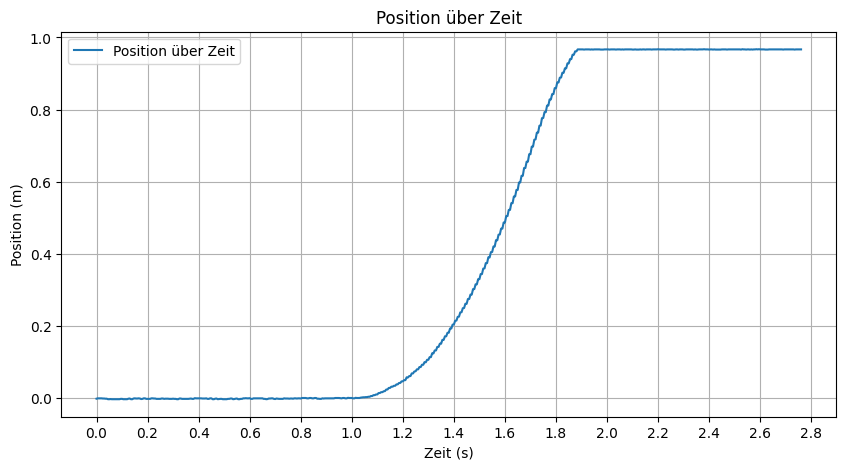

In [74]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Datei definieren (ersetzen durch den tatsächlichen Namen im aktuellen Verzeichnis)
file_name = "wenig_alu_mit_gewicht_19_8.txt"

# Verzeichnisse automatisch bestimmen
working_dir = os.getcwd()  # Nutzt das aktuelle Verzeichnis, wo das Skript läuft
input_file_path = os.path.join(working_dir, file_name)
original_filename = os.path.splitext(file_name)[0]
output_csv_path = os.path.join(working_dir, f"{original_filename}.csv")

# Datei einlesen, Header-Zeilen überspringen
data = pd.read_csv(
    input_file_path, skiprows=6, delimiter="\t", names=["Zeit", "Position"]
)

# Konvertiere Spalten in numerische Werte und entferne NaN-Werte
data = data.apply(pd.to_numeric, errors="coerce").dropna()

# Umrechnung von cm auf m
data["Position"] /= 100

# Rohdaten plotten und speichern
plt.figure(figsize=(10, 5))
plt.plot(data["Zeit"], data["Position"], label="Position über Zeit", alpha=1)
plt.xlabel("Zeit (s)")
plt.ylabel("Position (m)")
plt.title("Position über Zeit")
plt.legend()
plt.grid()
# Set x-ticks every 0.1 seconds
xticks = np.arange(data["Zeit"].min(), data["Zeit"].max() + 0.1, 0.2)
plt.xticks(xticks)
plt.savefig(f"Position_{original_filename}.png")
plt.show()

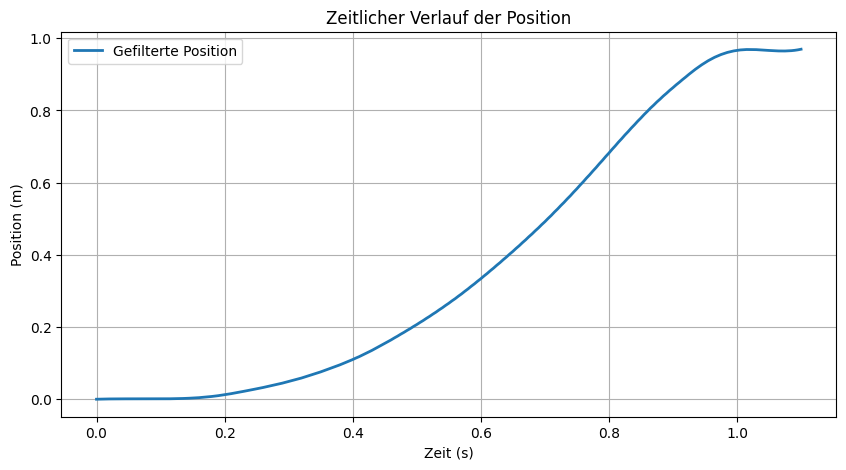

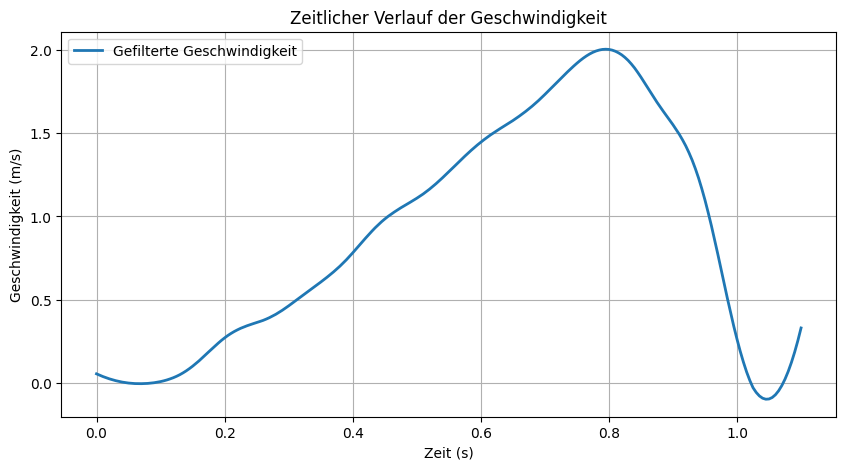

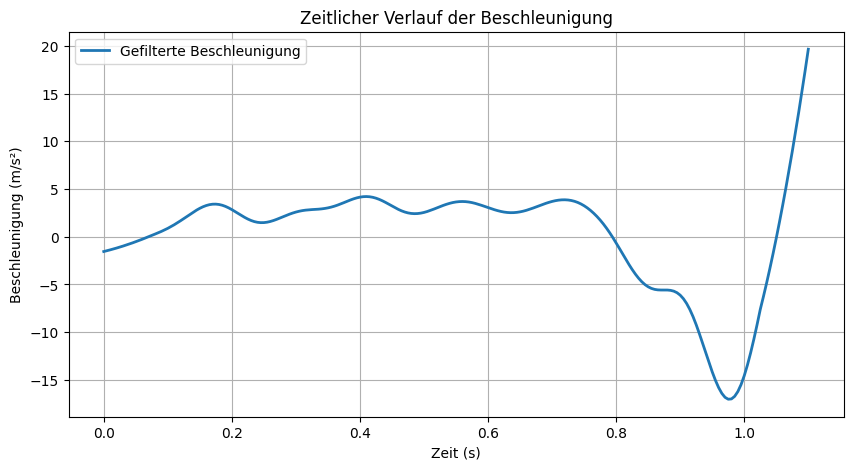

Daten gespeichert unter: /home/sam/ownCloud - Michael Saxer (zhaw.ch)@drive.switch.ch/6 Semester/Phys 2/Projekt/wenig_alu_mit_gewicht_19_8.csv


In [75]:
# Cutoff-Parameter (Standard: Keine Begrenzung)
t_min = 0.9
t_max = 2

# Standardmäßig gesamte Zeitspanne nehmen
t_min_default, t_max_default = data["Zeit"].min(), data["Zeit"].max()

# Falls Cutoff-Werte gesetzt sind, beschneide die Daten
t_min_final = t_min if t_min is not None else t_min_default
t_max_final = t_max if t_max is not None else t_max_default
data = data[(data["Zeit"] >= t_min_final) & (data["Zeit"] <= t_max_final)]
data["Zeit"] = data["Zeit"] - t_min_final

# Savitzky-Golay-Filterparameter
window_size = 31  # Muss ungerade sein
poly_order = 3

# Position filtern
position_filtered = savgol_filter(
    data["Position"], window_length=window_size, polyorder=poly_order
)

# Erste Ableitung (Geschwindigkeit) aus gefilterter Position
velocity_filtered = savgol_filter(
    position_filtered,
    window_length=window_size,
    polyorder=poly_order,
    deriv=1,
    delta=np.mean(np.diff(data["Zeit"])),
)

# Zweite Ableitung (Beschleunigung) aus gefilterter Geschwindigkeit
acceleration_filtered = savgol_filter(
    velocity_filtered,
    window_length=window_size,
    polyorder=poly_order,
    deriv=1,
    delta=np.mean(np.diff(data["Zeit"])),
)

# Position plotten und speichern
plt.figure(figsize=(10, 5))
plt.plot(data["Zeit"], position_filtered, label="Gefilterte Position", linewidth=2)
plt.xlabel("Zeit (s)")
plt.ylabel("Position (m)")
plt.title("Zeitlicher Verlauf der Position")
plt.legend()
plt.grid()
plt.savefig(f"Position_{original_filename}.png")
plt.show()

# Geschwindigkeit plotten und speichern
plt.figure(figsize=(10, 5))
plt.plot(
    data["Zeit"], velocity_filtered, label="Gefilterte Geschwindigkeit", linewidth=2
)
plt.xlabel("Zeit (s)")
plt.ylabel("Geschwindigkeit (m/s)")
plt.title("Zeitlicher Verlauf der Geschwindigkeit")
plt.legend()
plt.grid()
plt.savefig(f"Geschwindigkeit_{original_filename}.png")
plt.show()

# Beschleunigung plotten und speichern
plt.figure(figsize=(10, 5))
plt.plot(
    data["Zeit"], acceleration_filtered, label="Gefilterte Beschleunigung", linewidth=2
)
plt.xlabel("Zeit (s)")
plt.ylabel("Beschleunigung (m/s²)")
plt.title("Zeitlicher Verlauf der Beschleunigung")
plt.legend()
plt.grid()
# plt.yscale("log")

plt.savefig(f"Beschleunigung_{original_filename}.png")
plt.show()

# Daten in eine CSV-Datei speichern
processed_data = pd.DataFrame(
    {
        "Zeit (s)": data["Zeit"],
        "Gefilterte Position (m)": position_filtered,
        "Gefilterte Geschwindigkeit (m/s)": velocity_filtered,
        "Gefilterte Beschleunigung (m/s²)": acceleration_filtered,
    }
)

processed_data.to_csv(output_csv_path, index=False)

print(f"Daten gespeichert unter: {output_csv_path}")

even more plots

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Datei laden
file_path = "alu_ohne_gewicht_14_39.csv"
df = pd.read_csv(file_path)

# Zeitwerte extrahieren
time = df["Zeit (s)"]

# Werte für die drei Plots
position = df["Gefilterte Position (m)"]
velocity = df["Gefilterte Geschwindigkeit (m/s)"]
acceleration = df["Gefilterte Beschleunigung (m/s²)"]

# Plot erstellen
fig, ax1 = plt.subplots(figsize=(10, 6))

# Erste Achse für Position und Geschwindigkeit
ax1.set_xlabel("Zeit (s)")
ax1.set_ylabel("Position (m) / Geschwindigkeit (m/s)", color="tab:blue")
ax1.plot(time, position, label="Position (m)", color="tab:blue", linewidth=1)
ax1.plot(time, velocity, label="Geschwindigkeit (m/s)", color="tab:orange", linewidth=1)
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Zweite Achse für Beschleunigung
ax2 = ax1.twinx()
ax2.set_ylabel("Beschleunigung (m/s²)", color="tab:red")
ax2.plot(
    time, acceleration, label="Beschleunigung (m/s²)", color="tab:red", linewidth=1
)
ax2.tick_params(axis="y", labelcolor="tab:red")

# Titel und Gitter
fig.suptitle("Position, Geschwindigkeit und Beschleunigung über die Zeit")
ax1.grid(True)

# Legenden
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Plot anzeigen
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'alu_ohne_gewicht_14_39.csv'